In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Генератор точек в круге

Ограничение времени	1 секунда

Ограничение памяти	64.0 Мб

Ввод	стандартный ввод или input.txt

Вывод	стандартный вывод или output.txt


Петя написал два генератора точек в круге:

```
def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

```


```
def generate2():
    while True:
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)
```

Даны 100 наборов по 1000 точек, каждый набор сгенерирован каким-то одним из этих двух алгоритмов. Необходимо определить для каждого набора, первый или второй алгоритм использовался для его генерации.

Для того, чтобы получить ОК по этой задаче, надо предсказать правильный генератор хотя бы для 98 наборов.

**Формат ввода**

Даны 100 строк. Каждая строка отвечает за свой набор точек.

В каждой строке находится 2000 действительных чисел (−1≤ai≤1), разделённых пробелом. Точки идут подряд, то есть формат строки: x0 y0 x1 y1 x2 y2 ... x999 y999

**Формат вывода**

Нужно вывести 100 строк, в каждой из которой должно быть 1 число: 1 или 2, в зависимости от того, первым или вторым генератором был сгенерирован данный набор точек.

In [ ]:
def generate1():
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    x = a * np.cos(2 * math.pi * b)
    y = a * np.sin(2 * math.pi * b)
    return (x, y)

def generate2():
    while True:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)

In [ ]:
g1 = pd.DataFrame([generate1() for i in range(1000)], columns=['x', 'y'])
g2 = pd.DataFrame([generate2() for i in range(1000)], columns=['x', 'y'])
g2

,x,y
0,0.821121,-0.168917
1,0.013831,0.302386
2,0.720518,-0.083329
3,0.093543,0.783750
4,-0.193184,-0.846537
...,...,...
995,-0.639457,-0.303400
996,0.181188,-0.387701
997,0.268640,0.398954
998,-0.487176,-0.804971


<Axes: xlabel='x', ylabel='y'>

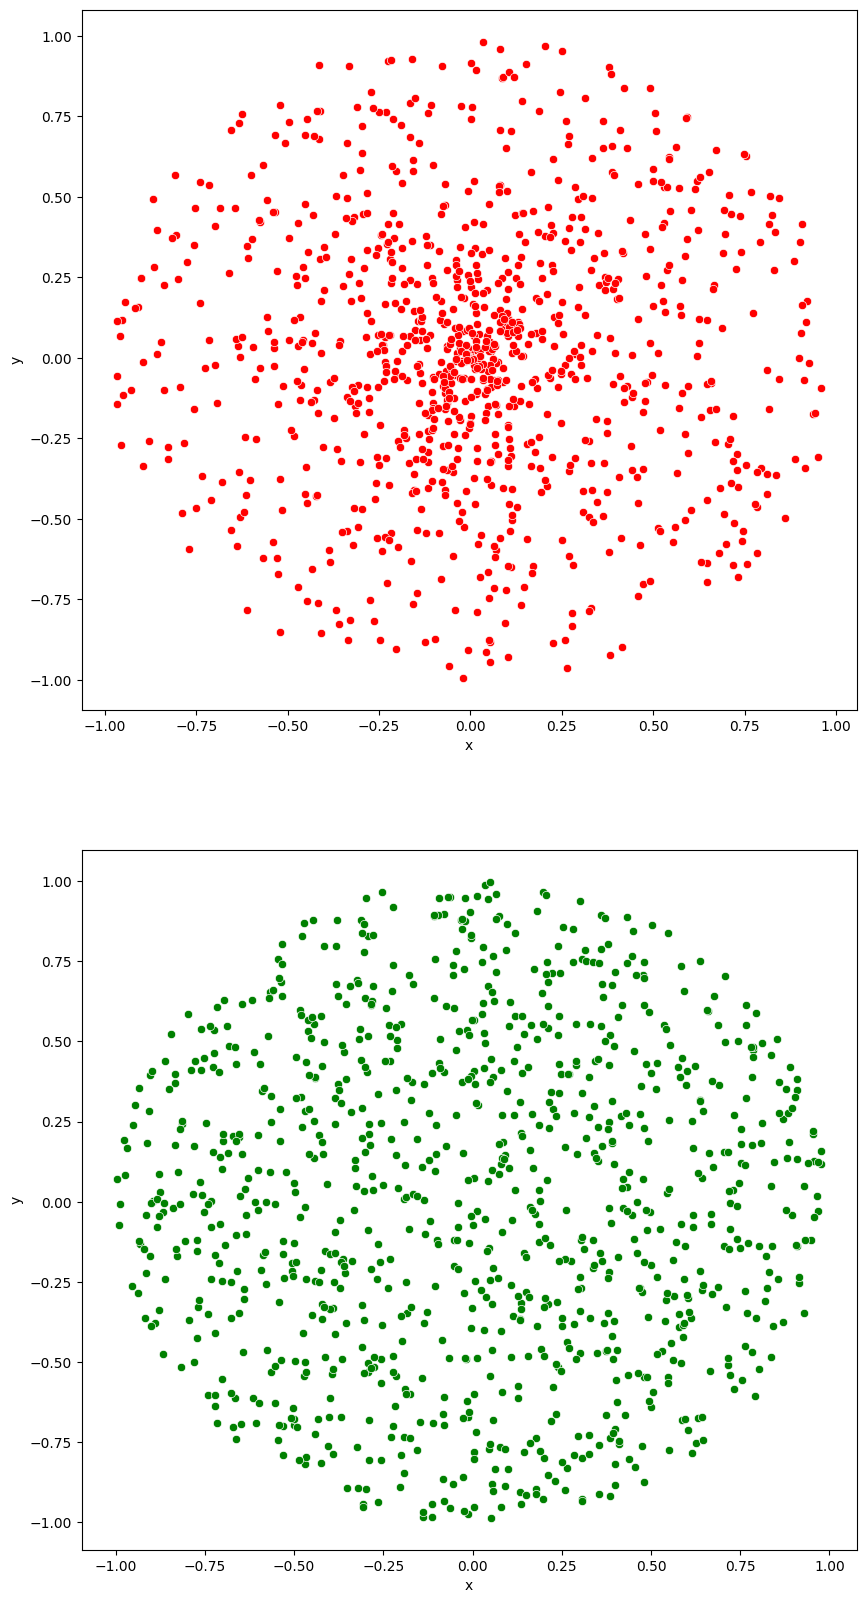

In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 20))
sns.scatterplot(g1, x='x', y='y', ax=axes[0], color='red', legend=True)
sns.scatterplot(g2, x='x', y='y', ax=axes[1], color='green', legend=True)

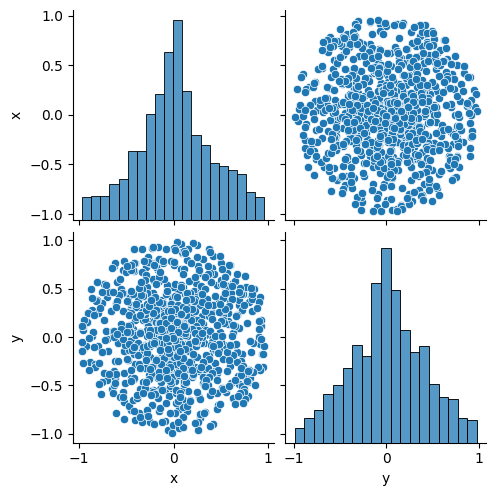

In [ ]:
sns.pairplot(g1)

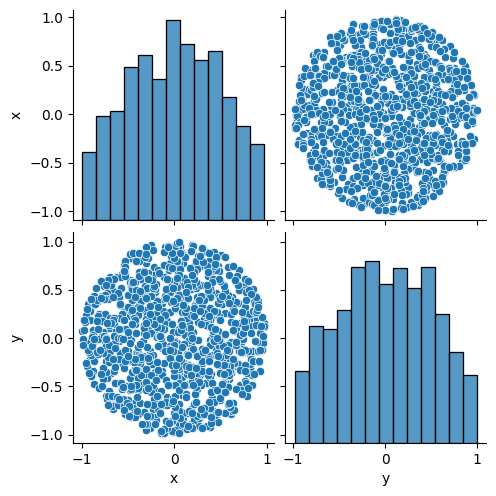

In [ ]:
sns.pairplot(g2)

In [ ]:
g1.x.mean(), g2.x.mean()

(0.01687736960763915, 0.0025867401872842885)

In [ ]:
g1.y.mean(), g2.y.mean()

(0.01335411129804888, 0.0023511956810707384)

In [ ]:
g1.x.std(), g2.x.std()

(0.3991472355310228, 0.49385378574381117)

In [ ]:
g1.y.std(), g2.y.std()

(0.4045679148246829, 0.49770678791599343)

In [ ]:
g1.x.median(), g2.x.median()

(0.008871789541841226, 0.013725769240635732)

In [ ]:
g1.y.median(), g2.y.median()

(0.011967352255781962, 0.0010870193174071785)

<Axes: xlabel='y', ylabel='Count'>

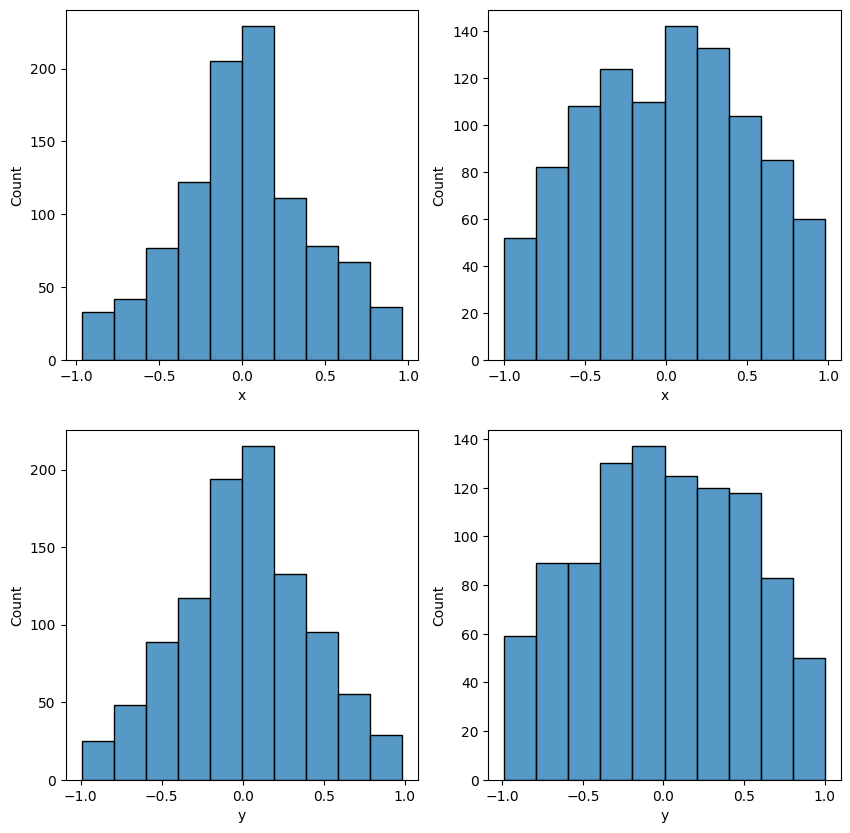

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(g1, x='x', ax=axes[0][0], bins=10)
sns.histplot(g2, x='x', ax=axes[0][1], bins=10)

sns.histplot(g1, x='y', ax=axes[1][0], bins=10)
sns.histplot(g2, x='y', ax=axes[1][1], bins=10)

Генерируем данные для обучения

In [ ]:
g1_text = '\n'.join([' '.join(["{0} {1}".format(*generate1()) for i in range(1000)])+' 1' for i in range(100)])
g2_text = '\n'.join([' '.join(["{0} {1}".format(*generate2()) for i in range(1000)])+' 2' for i in range(100)])

with open('train.txt', 'w') as file:
  file.write(g1_text+'\n'+g2_text)

train = []
with open('train.txt', 'r') as file:
  train = file.readlines()
train[0]

df = []
for i in train:
  sample = i.split(' ')
  label = int(sample[-1].replace('\n', ''))
  sample = sample[:-1]
  x = [float(j) for j in sample[::2]]
  y = [float(j) for j in sample[1::2]]
  x_features = np.histogram(x, bins=10)[0] / len(x)
  x_std = np.std(x)
  y_features = np.histogram(y, bins=10)[0] / len(y)
  y_std = np.std(y)

  sample = list(x_features) + [x_std] + list(y_features) + [y_std] + [label]

  df.append(sample)

df = pd.DataFrame(df, columns = ["x{0}".format(i) for i in range(10)] + ['x_std'] + ["y{0}".format(i) for i in range(10)] + ['y_std', 'label'])
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y2,y3,y4,y5,y6,y7,y8,y9,y_std,label
0,0.031,0.055,0.088,0.125,0.188,0.200,0.125,0.090,0.062,0.036,...,0.090,0.116,0.166,0.205,0.149,0.085,0.071,0.029,0.425152,1
1,0.034,0.062,0.086,0.109,0.231,0.173,0.118,0.098,0.058,0.031,...,0.086,0.120,0.205,0.208,0.125,0.082,0.062,0.027,0.410694,1
2,0.034,0.059,0.100,0.116,0.234,0.181,0.103,0.087,0.057,0.029,...,0.089,0.140,0.230,0.175,0.103,0.086,0.057,0.026,0.407491,1
3,0.027,0.053,0.079,0.124,0.185,0.231,0.127,0.077,0.062,0.035,...,0.084,0.103,0.217,0.213,0.111,0.091,0.054,0.037,0.410942,1
4,0.030,0.064,0.088,0.119,0.203,0.213,0.123,0.081,0.045,0.034,...,0.071,0.124,0.199,0.210,0.122,0.098,0.060,0.034,0.409846,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.058,0.098,0.115,0.121,0.117,0.114,0.109,0.111,0.094,0.063,...,0.096,0.111,0.125,0.124,0.129,0.105,0.095,0.066,0.501933,2
196,0.059,0.088,0.117,0.126,0.118,0.142,0.110,0.100,0.074,0.066,...,0.109,0.102,0.120,0.119,0.128,0.128,0.096,0.062,0.504006,2
197,0.059,0.083,0.101,0.122,0.139,0.124,0.126,0.106,0.091,0.049,...,0.111,0.110,0.116,0.125,0.120,0.120,0.085,0.058,0.496435,2
198,0.055,0.082,0.086,0.136,0.130,0.138,0.118,0.107,0.094,0.054,...,0.106,0.112,0.149,0.116,0.121,0.105,0.094,0.052,0.499405,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      200 non-null    float64
 1   x1      200 non-null    float64
 2   x2      200 non-null    float64
 3   x3      200 non-null    float64
 4   x4      200 non-null    float64
 5   x5      200 non-null    float64
 6   x6      200 non-null    float64
 7   x7      200 non-null    float64
 8   x8      200 non-null    float64
 9   x9      200 non-null    float64
 10  x_std   200 non-null    float64
 11  y0      200 non-null    float64
 12  y1      200 non-null    float64
 13  y2      200 non-null    float64
 14  y3      200 non-null    float64
 15  y4      200 non-null    float64
 16  y5      200 non-null    float64
 17  y6      200 non-null    float64
 18  y7      200 non-null    float64
 19  y8      200 non-null    float64
 20  y9      200 non-null    float64
 21  y_std   200 non-null    float64
 22  la

In [ ]:
from sklearn.svm import SVC

# Обучение классификатора методом опорных векторов
classifier = SVC(kernel='linear', C=1)
classifier.fit(df[df.columns[:-1]], df.label)

SVC(C=1, kernel='linear')

Считываю данные на тест и трансформирую их для дальнейшей обработки

In [ ]:
g1_text = '\n'.join([' '.join(["{0} {1}".format(*generate1()) for i in range(1000)]) for i in range(50)])
g2_text = '\n'.join([' '.join(["{0} {1}".format(*generate2()) for i in range(1000)]) for i in range(50)])

with open('input.txt', 'w') as file:
  file.write(g1_text+'\n'+g2_text)

In [ ]:
input_ = []
with open('input.txt', 'r') as file:
  input_ = file.readlines()
input_[0]

'0.1795985649829653 -0.09519112111335357 0.12193918360724514 0.7263327476710649 0.45725500407532005 0.431667450821884 -0.2879327255348477 0.6701783666732815 0.12462247896985763 0.048948297373114076 -0.5074078570395245 -0.6632438536377774 -0.10028754957238445 -0.4044083553294235 -0.23172365747035134 -0.18066632590680945 -0.17127969786105307 0.1359362634199042 0.060711016375029014 0.43228410432897707 0.1818103068184 0.7651505469083444 -0.5784576827622533 -0.3651984775629602 0.014745914346027938 -0.43828711896266426 -0.49136719553522623 0.6102886777499238 0.713297417856138 0.18098445087368653 -0.05658811323911045 -0.26231346949201634 -0.19290040686037593 0.22252047795410826 0.4722043596573908 0.27786435699097994 -0.4417783575857233 -0.7889236692590227 0.3034171091712738 0.18021729164688016 -0.7139104969419113 -0.4182314401044415 -0.3220516646248 0.26454958722132654 0.23474283799144727 -0.44633441690506537 -0.11858574177209796 0.06255690358531603 -0.1763578376203076 0.15868998192877082 -0.

In [ ]:
N = len(input_)
N

100

In [ ]:
df_test = []
for i in input_:
  sample = i.split(' ')
  x = [float(j) for j in sample[::2]]
  y = [float(j) for j in sample[1::2]]
  x_features = np.histogram(x, bins=10)[0] / len(x)
  x_std = np.std(x)
  y_features = np.histogram(y, bins=10)[0] / len(y)
  y_std = np.std(y)

  sample = list(x_features) + [x_std] + list(y_features) + [y_std]

  df_test.append(sample)

In [ ]:
df_test = pd.DataFrame(df_test, columns = ["x{0}".format(i) for i in range(10)] + ['x_std'] + ["y{0}".format(i) for i in range(10)] + ['y_std'])
df_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y1,y2,y3,y4,y5,y6,y7,y8,y9,y_std
0,0.035,0.056,0.081,0.134,0.212,0.198,0.117,0.075,0.066,0.026,...,0.052,0.090,0.129,0.224,0.196,0.115,0.083,0.043,0.036,0.401821
1,0.027,0.064,0.099,0.130,0.174,0.234,0.107,0.063,0.062,0.040,...,0.056,0.083,0.140,0.217,0.188,0.102,0.091,0.056,0.023,0.413481
2,0.037,0.070,0.089,0.111,0.210,0.202,0.136,0.078,0.048,0.019,...,0.065,0.074,0.111,0.196,0.224,0.125,0.090,0.046,0.038,0.406337
3,0.031,0.061,0.075,0.123,0.233,0.190,0.117,0.083,0.059,0.028,...,0.056,0.078,0.130,0.227,0.215,0.113,0.076,0.052,0.032,0.394159
4,0.027,0.057,0.088,0.111,0.225,0.192,0.117,0.086,0.061,0.036,...,0.049,0.085,0.111,0.185,0.257,0.128,0.075,0.062,0.024,0.382983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.053,0.103,0.109,0.117,0.121,0.137,0.119,0.110,0.078,0.053,...,0.083,0.119,0.114,0.126,0.119,0.122,0.127,0.088,0.063,0.493710
96,0.054,0.091,0.098,0.120,0.120,0.103,0.133,0.120,0.094,0.067,...,0.081,0.120,0.133,0.119,0.118,0.130,0.112,0.077,0.054,0.493886
97,0.051,0.076,0.113,0.132,0.111,0.142,0.109,0.098,0.099,0.069,...,0.108,0.126,0.137,0.110,0.128,0.113,0.102,0.081,0.048,0.487411
98,0.052,0.092,0.114,0.116,0.125,0.125,0.117,0.106,0.088,0.065,...,0.080,0.120,0.132,0.132,0.132,0.098,0.115,0.090,0.060,0.491698


In [ ]:
predictions = classifier.predict(df_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
sum(predictions == 1)

50

In [ ]:
predictions[0]

1

In [ ]:
output = ''
for i in predictions:
  output+=str(i)+'\n'
output

'1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n'

In [ ]:
with open('output.txt', 'w') as file:
  output = ''
  for i in predictions:
    output+=str(i)+'\n'
  file.write(output)

Код для платформы Яндекс

In [ ]:
import numpy as np
import math
from sklearn.svm import SVC

def generate1():
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    x = a * np.cos(2 * math.pi * b)
    y = a * np.sin(2 * math.pi * b)
    return (x, y)

def generate2():
    while True:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)


df = []
labels = []
for i in range(100):
  x = []
  y = []
  for j in range(1000):
    g1 = generate1()
    x.append(g1[0])
    y.append(g1[1])
  x_features = np.histogram(x, bins=10)[0] / len(x)
  x_std = np.std(x)
  y_features = np.histogram(y, bins=10)[0] / len(y)
  y_std = np.std(y)

  sample = list(x_features) + [x_std] + list(y_features) + [y_std]

  df.append(sample)
  labels.append(1)

for i in range(100):
  x = []
  y = []
  for j in range(1000):
    g2 = generate2()
    x.append(g2[0])
    y.append(g2[1])
  x_features = np.histogram(x, bins=10)[0] / len(x)
  x_std = np.std(x)
  y_features = np.histogram(y, bins=10)[0] / len(y)
  y_std = np.std(y)

  sample = list(x_features) + [x_std] + list(y_features) + [y_std]

  df.append(sample)
  labels.append(2)

# Обучение классификатора методом опорных векторов
classifier = SVC(kernel='linear', C=1)
classifier.fit(df, labels)

input_ = []
with open('input.txt', 'r') as file:
  input_ = file.readlines()

df_test = []
for i in input_:
  sample = i.split(' ')
  x = [float(j) for j in sample[::2]]
  y = [float(j) for j in sample[1::2]]
  x_features = np.histogram(x, bins=10)[0] / len(x)
  x_std = np.std(x)
  y_features = np.histogram(y, bins=10)[0] / len(y)
  y_std = np.std(y)

  sample = list(x_features) + [x_std] + list(y_features) + [y_std]

  df_test.append(sample)

predictions = classifier.predict(df_test)

with open('output.txt', 'w') as file:
  output = ''
  for i in predictions:
    output+=str(i)+'\n'
  file.write(output)

## Полное решение первогно задания

Код убыстренный через нумпай, так как код предыдущий не проходит скоростной тест.

In [ ]:
import numpy as np
from sklearn.svm import SVC

def generate1(n):
    a = np.random.uniform(0, 1, n)
    b = np.random.uniform(0, 1, n)
    x = a * np.cos(2 * np.pi * b)
    y = a * np.sin(2 * np.pi * b)
    return np.column_stack((x, y))

def generate2(n):
    while True:
        xy = np.random.uniform(-1, 1, (n, 2))
        distance_squared = np.sum(xy**2, axis=1)
        indices = distance_squared <= 1
        if np.any(indices):
            return xy[indices]

# Генерация данных для класса 1
data1 = generate1(100)
x1_features = np.histogram(data1[:, 0], bins=10)[0] / len(data1)
x1_std = np.std(data1[:, 0])
y1_features = np.histogram(data1[:, 1], bins=10)[0] / len(data1)
y1_std = np.std(data1[:, 1])

# Генерация данных для класса 2
data2 = generate2(100)
x2_features = np.histogram(data2[:, 0], bins=10)[0] / len(data2)
x2_std = np.std(data2[:, 0])
y2_features = np.histogram(data2[:, 1], bins=10)[0] / len(data2)
y2_std = np.std(data2[:, 1])

# Сбор данных и меток
df = np.array([np.concatenate((x1_features, [x1_std], y1_features, [y1_std])),
               np.concatenate((x2_features, [x2_std], y2_features, [y2_std]))])

labels = np.array([1, 2])

# Обучение классификатора методом опорных векторов
classifier = SVC(kernel='linear', C=1)
classifier.fit(df, labels)

# Генерация данных для теста
input_data = np.loadtxt('input.txt')
x_test = input_data[:, ::2]
y_test = input_data[:, 1::2]
x_test_features = np.apply_along_axis(lambda x: np.histogram(x, bins=10)[0] / len(x), 1, x_test)
x_test_std = np.std(x_test, axis=1)
y_test_features = np.apply_along_axis(lambda y: np.histogram(y, bins=10)[0] / len(y), 1, y_test)
y_test_std = np.std(y_test, axis=1)

df_test = np.column_stack((np.column_stack((x_test_features, x_test_std)),
                           np.column_stack((y_test_features, y_test_std))))

# Предсказание
predictions = classifier.predict(df_test)

# Сохранение результата
np.savetxt('output.txt', predictions, fmt='%d')